Steps involved in this project:
- Dataset preparation of dog and cat images for the model
- Develop a Baseline CNN Model
- Model Improvements
- Finalize the Model and Make Predictions

Dataset: https://www.kaggle.com/c/dogs-vs-cats/data

Only 10000 images of both dog and cat are used for the training and 2500 images each for the test data
The images are labeled by their filename, with the word “dog” or “cat“

### Plotting Cat and Dog photos from the dogs & cats dataset

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

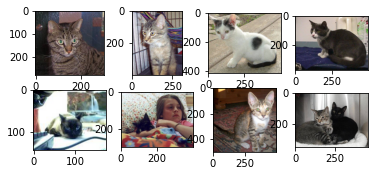

In [2]:
# Manually inspected the train data folder for the images sequence labelled number
folder = 'Dogs & Cats images dataset/train/cats/' # path for cat images folder
for i in range(1,9):
    plt.subplot(3,4,i) # row, column and index
    filename = folder + 'cat.' + str(i) + '.jpg'
    image = imread(filename) # load images
    plt.imshow(image) # plot figure
plt.show()

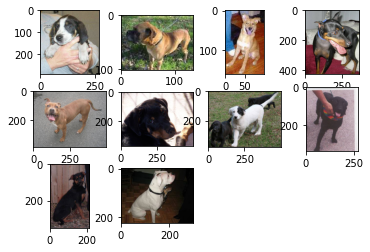

In [3]:
# Similarly for plotting dog images
folder = 'Dogs & Cats images dataset/train/dogs/'
for i in range(10,20):
    plt.subplot(3,4,i-9)
    filename = folder + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
plt.show()

- We can see that all photos are of different sizes
- Now first part is we are going to standardize photo size. All images needs to be reshaped and of same size before fitting into the model. So the easy resize operation here we can do is to stretch and deform the aspect ratio of each image and force it into the new shape of 32x32 pixels(having constraint of system specs i3 and 8gb)
- The data is already processed having labelled and splitted into 75-25% traintest but if we are going to process or reshape the data from main dataset and saving it to numpy array it will take huge memory and time too. so we are leaving this process :-p.

### Importing libraries

In [4]:
import sys
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print('Tensorflow version: ',tf.__version__)

Tensorflow version:  2.3.1


### Data Preparation

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [5]:
# Data generator
datagen = ImageDataGenerator(rescale=1.0/255.0) # Scale the pixel values between 0 to 1

# Iterators 
training_data = datagen.flow_from_directory('Dogs & Cats images dataset/train/',
    class_mode='binary', batch_size=32, target_size=(32, 32))

Found 20000 images belonging to 2 classes.


In [6]:
test_data = datagen.flow_from_directory('Dogs & Cats images dataset/test/',
    class_mode='binary', batch_size=32, target_size=(32, 32))

Found 5000 images belonging to 2 classes.


The number of steps for the train and test iterators must be specified. This is the number of batches that will comprise one epoch. This can be specified via the length of each iterator, and will be the total number of images in the train and test directories divided by the batch size (32).

### Baseline Convolutional Neural Network Model

The architecture involves stacking convolutional layers with small 3×3 filters followed by a max pooling layer. Together, these layers form a block, and these blocks can be repeated where the number of filters in each block is increased with the depth of the network such as 32, 64, 128, 256 for the first four blocks of the model. Padding is used on the convolutional layers to ensure the height and width shapes of the output feature maps matches the inputs.

Each layer will use the ReLU activation function and the He weight initialization, which are generally best practices. For example, a 3-block VGG-style architecture where each block has a single convolutional and pooling layer can be defined

The model will be fit with **stochastic gradient descent** and we will start with a conservative learning rate of 0.001 and a momentum of 0.9.

The problem is a **binary classification** task, requiring the prediction of one value of either 0 or 1. An output layer with 1 node and a **sigmoid activation** will be used and the model will be optimized using the binary cross-entropy loss function.

### One Block VGG Model
- Single convolutional layer with 32 filters followed by a max pooling layer.

In [7]:
# defining model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,049,729
Trainable params: 1,049,729
Non-trainable params: 0
_________________________________________________________________


###### Last time training it tooks 45 minutes after increasing epoch from 10 to 15 and the model achieved an accuracy of about 75.580% on the test dataset . Now running it again in 20 epoch and will see the difference

In [9]:
%%time
# fit model
history = model.fit(training_data, steps_per_epoch=len(training_data), 
                    validation_data=test_data, validation_steps=len(test_data), epochs=20, verbose=1)

Epoch 1/20
625/625 [==============================] - 245s 392ms/step - loss: 0.6630 - accuracy: 0.5986 - val_loss: 0.6230 - val_accuracy: 0.6604
Epoch 2/20
625/625 [==============================] - 98s 156ms/step - loss: 0.6195 - accuracy: 0.6575 - val_loss: 0.6028 - val_accuracy: 0.6788
Epoch 3/20
625/625 [==============================] - 97s 156ms/step - loss: 0.5961 - accuracy: 0.6787 - val_loss: 0.5828 - val_accuracy: 0.7006
Epoch 4/20
625/625 [==============================] - 99s 158ms/step - loss: 0.5765 - accuracy: 0.6970 - val_loss: 0.5948 - val_accuracy: 0.6878
Epoch 5/20
625/625 [==============================] - 97s 156ms/step - loss: 0.5604 - accuracy: 0.7103 - val_loss: 0.5560 - val_accuracy: 0.7188
Epoch 6/20
625/625 [==============================] - 97s 156ms/step - loss: 0.5398 - accuracy: 0.7286 - val_loss: 0.5586 - val_accuracy: 0.7094
Epoch 7/20
625/625 [==============================] - 97s 156ms/step - loss: 0.5237 - accuracy: 0.7404 - val_loss: 0.5336 - val_a

1st run:

Epoch 10/10
626/626 [==============================] - 98s 156ms/step - loss: 0.4884 - accuracy: 0.7657 - val_loss: 0.5184 - val_accuracy: 0.7550

Current run:

625/625 [==============================] - 99s 158ms/step - loss: 0.3534 - accuracy: 0.8481 - val_loss: 0.5296 - val_accuracy: 0.7488


Once fit, the final model can be evaluated on the test dataset directly and the classification accuracy reported

In [10]:
# evaluate model
_, acc = model.evaluate(test_data, steps=len(test_data), verbose=0)
print('Model Evaluation: %.3f' % (acc * 100.0))

Model Evaluation: 74.880


#### Line plot for the accuracy and another for the loss of the model on both the train and test datasets.

In [3]:
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1,epoch+1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Classification Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'validation'], loc = 'upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'validation'], loc = 'upper left')
    plt.show()

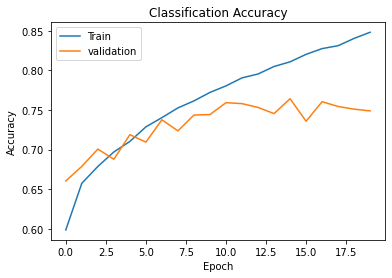

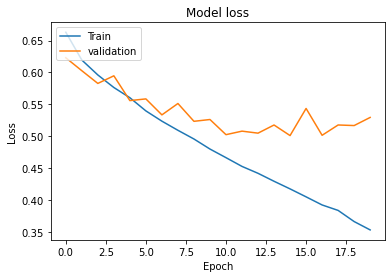

In [12]:
plot_learningCurve(history, 20)

In this case we can see the model appears to have overfit the training dataset at around 10-12 training epochs.

### Two Block VGG Model
- Extends the one block model and adds a second block with 64 filters.

In [17]:
# defining model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [19]:
%%time
# fit model
history = model.fit(training_data, steps_per_epoch=len(training_data),
    validation_data=test_data, validation_steps=len(test_data), epochs=20, verbose=1)

Epoch 1/20
625/625 [==============================] - 112s 179ms/step - loss: 0.6636 - accuracy: 0.5980 - val_loss: 0.6183 - val_accuracy: 0.6792
Epoch 2/20
625/625 [==============================] - 123s 197ms/step - loss: 0.6091 - accuracy: 0.6700 - val_loss: 0.5838 - val_accuracy: 0.6978
Epoch 3/20
625/625 [==============================] - 112s 180ms/step - loss: 0.5832 - accuracy: 0.6920 - val_loss: 0.5625 - val_accuracy: 0.7200
Epoch 4/20
625/625 [==============================] - 106s 169ms/step - loss: 0.5582 - accuracy: 0.7157 - val_loss: 0.5683 - val_accuracy: 0.7108
Epoch 5/20
625/625 [==============================] - 104s 167ms/step - loss: 0.5375 - accuracy: 0.7314 - val_loss: 0.5316 - val_accuracy: 0.7394
Epoch 6/20
625/625 [==============================] - 103s 165ms/step - loss: 0.5194 - accuracy: 0.7441 - val_loss: 0.5728 - val_accuracy: 0.6936
Epoch 7/20
625/625 [==============================] - 104s 166ms/step - loss: 0.5038 - accuracy: 0.7567 - val_loss: 0.5094 -

last time
Epoch 20/20
626/626 [==============================] - 109s 174ms/step - loss: 0.3488 - accuracy: 0.8478 - val_loss: 0.4939 - val_accuracy: 0.7730

In [20]:
# evaluate model
_, acc = model.evaluate(test_data, steps=len(test_data), verbose=0)
print('Model Evaluation: %.3f' % (acc * 100.0))

Model Evaluation: 77.260


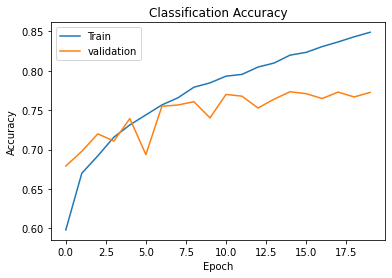

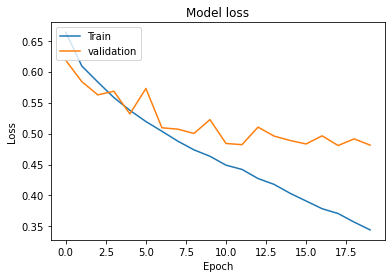

In [21]:
plot_learningCurve(history, 20)

In this case, we can see that the model achieved a small improvement in performance from about **74% with one block to about 77% accuracy with two blocks**

Reviewing the plot of the learning curves, we can see that again the model appears to have overfit the training dataset, perhaps sooner, in this case at around 9 and 10 training epochs.

### Three Block VGG Model
- Extends the two block model and adds a third block with 128 filters.

In [22]:
# defining model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

In [24]:
%%time
# Fit model
history = model.fit(training_data, steps_per_epoch=len(training_data),
    validation_data=test_data, validation_steps=len(test_data), epochs=20, verbose=1)

Epoch 1/20
625/625 [==============================] - 113s 181ms/step - loss: 0.6611 - accuracy: 0.6019 - val_loss: 0.6124 - val_accuracy: 0.6706
Epoch 2/20
625/625 [==============================] - 112s 180ms/step - loss: 0.6088 - accuracy: 0.6706 - val_loss: 0.5792 - val_accuracy: 0.6998
Epoch 3/20
625/625 [==============================] - 113s 181ms/step - loss: 0.5750 - accuracy: 0.6992 - val_loss: 0.5552 - val_accuracy: 0.7236
Epoch 4/20
625/625 [==============================] - 112s 179ms/step - loss: 0.5459 - accuracy: 0.7222 - val_loss: 0.5447 - val_accuracy: 0.7280
Epoch 5/20
625/625 [==============================] - 112s 179ms/step - loss: 0.5278 - accuracy: 0.7376 - val_loss: 0.5605 - val_accuracy: 0.7080
Epoch 6/20
625/625 [==============================] - 116s 185ms/step - loss: 0.5100 - accuracy: 0.7502 - val_loss: 0.5164 - val_accuracy: 0.7474
Epoch 7/20
625/625 [==============================] - 113s 181ms/step - loss: 0.4945 - accuracy: 0.7620 - val_loss: 0.5356 -

on first run
- Epoch 20/20
626/626 [==============================] - 114s 182ms/step - loss: 0.2640 - accuracy: 0.8915 - val_loss: 0.5150 - val_accuracy: 0.7804

2nd time:
- Epoch 20/20
625/625 [==============================] - 112s 180ms/step - loss: 0.3065 - accuracy: 0.8690 - val_loss: 0.4958 - val_accuracy: 0.7830

In [25]:
# evaluate model
_, acc = model.evaluate(test_data, steps=len(test_data), verbose=0)
print('Model Evaluation: %.3f' % (acc * 100.0))

Model Evaluation: 78.300


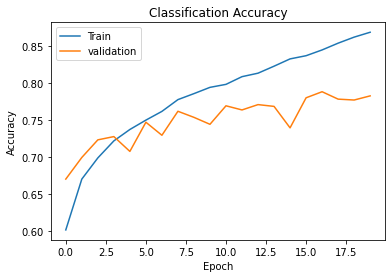

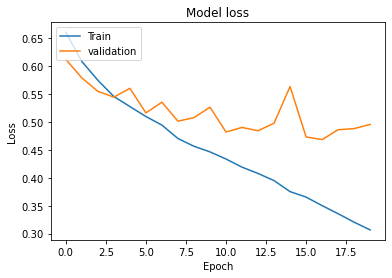

In [26]:
plot_learningCurve(history, 20)

In this case, we can see that we achieved a further lift in performance from about **77.30% with two blocks to about 78.30% accuracy** with three blocks.

but this model seems to be overfitted early around 11 epoch.

## Results of Above three different models with a VGG-based architecture

**Summary**
- Model: validation, training acurracy, training time taken
- VGG 1:...74.88%.......84.81%................35min 6s
- VGG 2:...77.30%.......84.78%................35min 36s
- VGG 3:...78.30%.......86.90%................37min 36s

We see a trend of improved performance with the increase in capacity, but also a similar case of overfitting occurring earlier and earlier in the run.

So now we are going for regularization techniques we'll see how much improvement we can get after this. 
Techniques includes:
- Dropout
- Dropout + Batch Normalization
- Weight decay
- Data augmentation. 

## Model Improvements Process
- These approaches are expected to slow the rate of improvement during training and hopefully counter the overfitting of the training dataset. As such, we will increase the number of training epochs from 20 to 50 to give the model more space for refinement.

### Dropout Regularization

In [27]:
# defining model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
model.summary() 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)        

In [29]:
%%time
# Fit model
history = model.fit(training_data, steps_per_epoch=len(training_data),
    validation_data=test_data, validation_steps=len(test_data), epochs=50, verbose=1)

Epoch 1/50
625/625 [==============================] - 118s 188ms/step - loss: 0.7047 - accuracy: 0.5239 - val_loss: 0.6867 - val_accuracy: 0.5778
Epoch 2/50
625/625 [==============================] - 117s 187ms/step - loss: 0.6830 - accuracy: 0.5528 - val_loss: 0.6745 - val_accuracy: 0.6272
Epoch 3/50
625/625 [==============================] - 123s 198ms/step - loss: 0.6732 - accuracy: 0.5805 - val_loss: 0.6735 - val_accuracy: 0.5708
Epoch 4/50
625/625 [==============================] - 122s 195ms/step - loss: 0.6620 - accuracy: 0.6033 - val_loss: 0.6509 - val_accuracy: 0.6384
Epoch 5/50
625/625 [==============================] - 118s 189ms/step - loss: 0.6530 - accuracy: 0.6155 - val_loss: 0.6393 - val_accuracy: 0.6542
Epoch 6/50
625/625 [==============================] - 118s 190ms/step - loss: 0.6429 - accuracy: 0.6281 - val_loss: 0.6551 - val_accuracy: 0.5952
Epoch 7/50
625/625 [==============================] - 119s 191ms/step - loss: 0.6331 - accuracy: 0.6420 - val_loss: 0.6314 -

1st time:

Epoch 50/50
626/626 [==============================] - 127s 203ms/step - loss: 0.4384 - accuracy: 0.7978 - val_loss: 0.4244 - val_accuracy: 0.8008

2nd time:

Epoch 50/50
625/625 [==============================] - 117s 188ms/step - loss: 0.4326 - accuracy: 0.7986 - val_loss: 0.4297 - val_accuracy: 0.7996

In [30]:
# evaluate model
_, acc = model.evaluate(test_data, steps=len(test_data), verbose=0)
print('Model Evaluation: %.3f' % (acc * 100.0))

Model Evaluation: 79.960


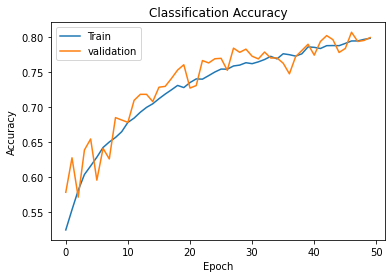

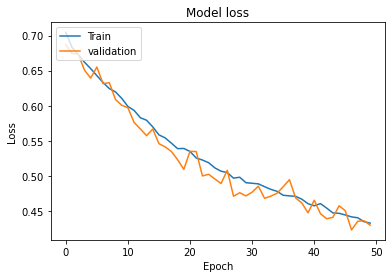

In [31]:
plot_learningCurve(history, 50)

From this learning curves, we can see that dropout has had an effect on the rate of improvement of the model on both the train and test sets.

Overfitting has been reduced or delayed, although performance may begin to stall towards the end of the run.

The results suggest that further training epochs may result in further improvement of the model. It may also be interesting to explore perhaps a slightly higher dropout rate after the VGG blocks in addition to the increase in training epochs.

### Dropout Regularization and Batch Normalizations

In [32]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add((BatchNormalization()))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add((BatchNormalization()))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add((BatchNormalization()))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add((BatchNormalization()))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)         

In [34]:
%%time
# Fit model
history = model.fit(training_data, steps_per_epoch=len(training_data),
    validation_data=test_data, validation_steps=len(test_data), epochs=50, verbose=1)

Epoch 1/50
625/625 [==============================] - 144s 231ms/step - loss: 0.7388 - accuracy: 0.5948 - val_loss: 0.6243 - val_accuracy: 0.6786
Epoch 2/50
625/625 [==============================] - 143s 229ms/step - loss: 0.6280 - accuracy: 0.6520 - val_loss: 0.6185 - val_accuracy: 0.6570
Epoch 3/50
625/625 [==============================] - 143s 229ms/step - loss: 0.6145 - accuracy: 0.6608 - val_loss: 0.5893 - val_accuracy: 0.6966
Epoch 4/50
625/625 [==============================] - 144s 230ms/step - loss: 0.6059 - accuracy: 0.6727 - val_loss: 0.6234 - val_accuracy: 0.6310
Epoch 5/50
625/625 [==============================] - 147s 235ms/step - loss: 0.5977 - accuracy: 0.6801 - val_loss: 0.5773 - val_accuracy: 0.7064
Epoch 6/50
625/625 [==============================] - 151s 241ms/step - loss: 0.5880 - accuracy: 0.6891 - val_loss: 0.5831 - val_accuracy: 0.6862
Epoch 7/50
625/625 [==============================] - 146s 234ms/step - loss: 0.5830 - accuracy: 0.6911 - val_loss: 0.5634 -

In [35]:
# evaluate model
_, acc = model.evaluate(test_data, steps=len(test_data), verbose=0)
print('Model Evaluation: %.3f' % (acc * 100.0))

Model Evaluation: 76.640


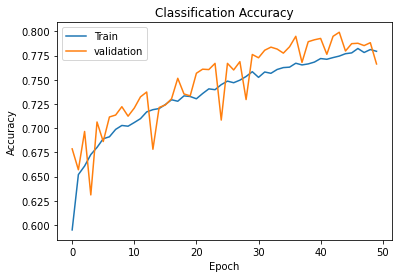

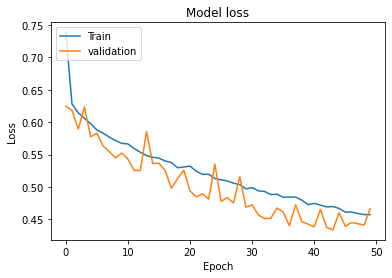

In [36]:
plot_learningCurve(history, 50)

Reviewing this learning curve we can see validation acurracy is much lower as compared to dropout regularization so it seems dropout+ batchnormalization is fruitful. Our model performace degraded.

### Image Data Augmentation

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Iterators
training_data = train_datagen.flow_from_directory('Dogs & Cats images dataset/train/',
    class_mode='binary', batch_size=32, target_size=(32, 32))
test_data = test_datagen.flow_from_directory('Dogs & Cats images dataset/test/',
    class_mode='binary', batch_size=32, target_size=(32, 32))

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [5]:
# define cnn model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [8]:
%%time
# fit model
history = model.fit(training_data, steps_per_epoch=len(training_data),
    validation_data=test_data, validation_steps=len(test_data), epochs=50, verbose=1)

Epoch 1/50
625/625 [==============================] - 481s 769ms/step - loss: 0.6580 - accuracy: 0.6061 - val_loss: 0.6157 - val_accuracy: 0.6632
Epoch 2/50
625/625 [==============================] - 141s 226ms/step - loss: 0.6313 - accuracy: 0.6410 - val_loss: 0.6167 - val_accuracy: 0.6408
Epoch 3/50
625/625 [==============================] - 132s 211ms/step - loss: 0.6110 - accuracy: 0.6644 - val_loss: 0.7359 - val_accuracy: 0.5664
Epoch 4/50
625/625 [==============================] - 129s 207ms/step - loss: 0.5962 - accuracy: 0.6802 - val_loss: 0.5714 - val_accuracy: 0.7120
Epoch 5/50
625/625 [==============================] - 124s 199ms/step - loss: 0.5803 - accuracy: 0.6923 - val_loss: 0.5430 - val_accuracy: 0.7244
Epoch 6/50
625/625 [==============================] - 135s 216ms/step - loss: 0.5678 - accuracy: 0.7052 - val_loss: 0.5868 - val_accuracy: 0.6784
Epoch 7/50
625/625 [==============================] - 130s 208ms/step - loss: 0.5544 - accuracy: 0.7163 - val_loss: 0.5269 -

In [9]:
# evaluate model
_, acc = model.evaluate(test_data, steps=len(test_data), verbose=0)
print('Model Evaluation: %.3f' % (acc * 100.0))

Model Evaluation: 81.660


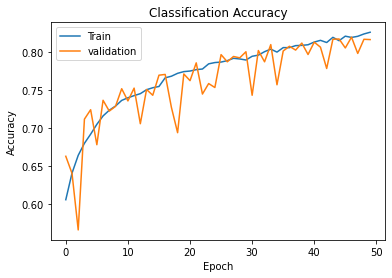

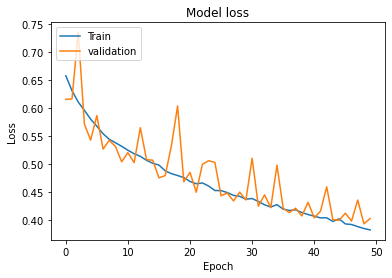

In [10]:
plot_learningCurve(history, 50)

### Summary:

- **VGG3 + Dropout:** <br>
   val_acc: 79.96%  trai_acc: 79.86% t.timetaken:1h 39min 1s <br>
   
- **VGG3 + Dropout + Batch Normalization :** <br> 
    76.64%, 77.95, 2h 3min 14s <br>
    
- **VGG3 + Data Augmentation:** <br> 
   81.66,  82.63%,  1h 53min 8s <br>

Here we see model improvement by regularization techniques slows the progression of the learning algorithms and reduces overfitting, resulting in improved performance on the holdout dataset.
**Here we got an accuracy of 81.66%**
further more we can improve the performance by combination of these three and using more training data and also increasing pixel images from 32*32 we used here to bigger one but the price will be paid to the time and the system :-)

So finally we are saving the last model with acurracy of 82 for prediction

### Saving the model

In [16]:
# save model
model.save('dog and cat image classifier.h5')

### Loading back our classification model 

In [35]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

In [34]:
# load model
model = load_model('dog and cat image classifier.h5')

In [36]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(32, 32))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 32, 32, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939] ##The input images should be zero-centered by mean pixel (rather than mean image) subtraction. Namely, the following BGR values should be subtracted: [103.939, 116.779, 123.68].
    return img

### Prediction

In [38]:
img = load_image('sample_image.jpg')
result = model.predict(img)
if result[0][0]== 0.0:
    print("it's a Cat")
else:
    print("it's a Dog")

it's a Cat


In [39]:
img = load_image('sample_image1.jpg')
result = model.predict(img)
if result[0][0]== 0.0:
    print("it's a Cat")
else:
    print("it's a Dog")

it's a Dog
